In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
uploaded=files.upload()

Saving twitter.csv to twitter.csv


In [ ]:
data=pd.read_csv('twitter.csv')

In [ ]:
apikey=data['key'][0]
apisecret=data['key'][1]
accesstoken=data['key'][2]

In [ ]:
authentic=tweepy.OAuthHandler(apikey,apisecret)
api=tweepy.API(authentic,wait_on_rate_limit=True)

In [ ]:
posts=api.user_timeline(screen_name="BarackObama",count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[0:5]:
  print(str(i)+'.'+' '+tweet.full_text + '\n')
  i=i+1

1. If we pour all our effort into these last five days and vote up and down the ticket like never before, then we will elect @JoeBiden and @KamalaHarris. And we will leave no doubt about who we are and what this country stands for. Let's go. https://t.co/RSw1Dib5Xh

2. Here are some helpful tips about voting in person this year. Do vote early if you can, don't get out of line, and a couple of other important reminders. If you're voting by mail, now is the time to drop off your ballot at a drop box or an election office. https://t.co/NQFkNd2ppT

3. Thanks for making your voice heard, Adam. I know a thing or two about being hopeful in the rain, too. https://t.co/hBMNHE9dYo https://t.co/tTDp90xr9O

4. This right here is what it's all about. Tell your mom thank you for voting, Leta. https://t.co/jx3i9laoWn

5. Stella, thank you for being a poll worker. You’re making a difference and helping folks cast their ballot safely. https://t.co/oPXWnBi5Ud



In [ ]:
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,If we pour all our effort into these last five...
1,Here are some helpful tips about voting in per...
2,"Thanks for making your voice heard, Adam. I kn..."
3,This right here is what it's all about. Tell y...
4,"Stella, thank you for being a poll worker. You..."


In [ ]:
def cleaning(text):
  text=re.sub(r'@[A-Za-z0-9]+',' ',text)
  text=re.sub(r'#',' ',text)
  text=re.sub(r'http\S+',' ',text)
  return text
df['Tweets']=df['Tweets'].apply(cleaning)
df

,Tweets
0,If we pour all our effort into these last five...
1,Here are some helpful tips about voting in per...
2,"Thanks for making your voice heard, Adam. I kn..."
3,This right here is what it's all about. Tell y...
4,"Stella, thank you for being a poll worker. You..."
...,...
95,"Ella Baker, a giant of the civil rights moveme..."
96,While other countries around the world have su...
97,Tonight our next President made the case for...
98,Do make a plan right now for how you’re going ...


In [ ]:
def subj(text):
  return TextBlob(text).sentiment.subjectivity
def polar(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(subj)
df['Polarity']=df['Tweets'].apply(polar)
df.head()

,Tweets,Subjectivity,Polarity
0,If we pour all our effort into these last five...,0.418519,0.214815
1,Here are some helpful tips about voting in per...,0.558333,0.125000
2,"Thanks for making your voice heard, Adam. I kn...",0.200000,0.200000
3,This right here is what it's all about. Tell y...,0.535714,0.285714
4,"Stella, thank you for being a poll worker. You...",0.500000,0.500000


(-0.5, 699.5, 499.5, -0.5)

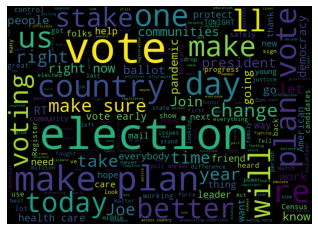

In [ ]:
allw=' '.join([t for t in df['Tweets']])
wc=WordCloud(width=700,height=500,random_state=21,max_font_size=100).generate(allw)
plt.imshow(wc)
plt.axis('off')


In [ ]:
def wordscore(score):
  if score<0:
   return 'Negative'
  elif score==0:
   return 'Neutral'
  else:
    return 'Positive'
df['Results']=df['Polarity'].apply(wordscore)
df

,Tweets,Subjectivity,Polarity,Results
0,If we pour all our effort into these last five...,0.418519,0.214815,Positive
1,Here are some helpful tips about voting in per...,0.558333,0.125000,Positive
2,"Thanks for making your voice heard, Adam. I kn...",0.200000,0.200000,Positive
3,This right here is what it's all about. Tell y...,0.535714,0.285714,Positive
4,"Stella, thank you for being a poll worker. You...",0.500000,0.500000,Positive
...,...,...,...,...
95,"Ella Baker, a giant of the civil rights moveme...",0.608929,0.033929,Positive
96,While other countries around the world have su...,0.645000,0.085000,Positive
97,Tonight our next President made the case for...,0.296296,0.166667,Positive
98,Do make a plan right now for how you’re going ...,0.417857,0.192857,Positive


In [ ]:
j=1
sorted=df.sort_values(by=['Polarity'])
for i in range(0,sorted.shape[0]):
  if(sorted['Results'][i]=='Positive'):
    print(str(j)+')'+sorted['Tweets'][i])
    print()
    j=j+1


1)If we pour all our effort into these last five days and vote up and down the ticket like never before, then we will elect   and  . And we will leave no doubt about who we are and what this country stands for. Let's go.  

2)Here are some helpful tips about voting in person this year. Do vote early if you can, don't get out of line, and a couple of other important reminders. If you're voting by mail, now is the time to drop off your ballot at a drop box or an election office.  

3)Thanks for making your voice heard, Adam. I know a thing or two about being hopeful in the rain, too.    

4)This right here is what it's all about. Tell your mom thank you for voting, Leta.  

5)Stella, thank you for being a poll worker. You’re making a difference and helping folks cast their ballot safely.  

6)RT  : With one week left until Election Day, I'm delivering remarks in Warm Springs, Georgia, on how we can unite to address the cr…

7)We’ve only got one week left in this election. I’m in Orlando 

In [ ]:
j=1
sorted=df.sort_values(by=['Polarity'])
for i in range(0,sorted.shape[0]):
  if(sorted['Results'][i]=='Negative'):
    print(str(j)+')'+sorted['Tweets'][i])
    print()
    j=j+1

1)Felicidades, Sofia — I'll bet your car decorations alone inspired a few folks to head to the polls! Thank you for making your voice heard. It matters.  

2)To anyone considering sitting this election out, look at this image. Then make a plan to vote. You're an inspiration to all of us, Brian — and we're all behind you in this fight.  

3)RT  : Tune in as   sits down with community leaders in Philadelphia to talk about what’s at stake in this election.  

4)In Madison, WI, community groups will now choose the members of a new civilian police oversight board, which must include at least one member who was previously incarcerated.
 

5)We've only got 20 days to go until Election Day – and we've got to vote for   and Democrats up and down the ballot. I talked to   about this election, the 2020 Census, and the role we can all play to create change in the months ahead.  

6)Complete the Census before it's too late—it determines the resources your community will get over the next decade, fr

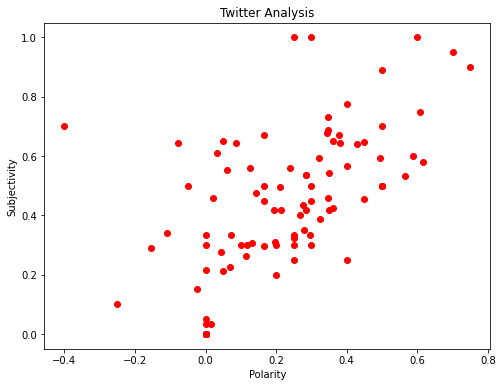

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='red')
plt.title('Twitter Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



In [ ]:
posit=df[df.Results=='Positive']
posit=posit['Tweets']
round((posit.shape[0]/df.shape[0])*100,1)


74.0

In [ ]:
negit=df[df.Results=='Negative']
negit=negit['Tweets']
round((negit.shape[0]/df.shape[0])*100,1)

7.0

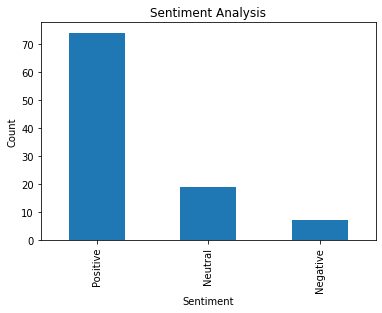

In [ ]:
df['Results'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Results'].value_counts().plot(kind='bar')
plt.show()